# ch03.02. 여러가지 확률 분포
---
* 날짜:
* 이름:

## 학습내용
    * 연속형 확률변수 -> 확률 밀도 함수 -> 연속형 확률 분포
      - 균등 분포
      - 정규 분포
      - 감마 분포
      - 베타 분포
      - 카이제곱 분포
    * 이산형 확률변수 -> 확률 질량 함수 -> 이산형 확률 분포
      - 베르누이 분포
      - 이항분포
      - 카테고리 확률 분포
      - 포아송 분포
      - 기하 분포
      - 음이항 분포
      - 초기하 분포


In [109]:
import numpy as np                                          # 넘파이
import matplotlib.pyplot as plt                          # 메타포트
import pandas as pd                                          # 판다스
import scipy as sp                                              # 사이
from scipy import *                                            # dir(norm()) 이런거 쓰려면 있어야 함
from scipy.stats import *                                    # 안의 함수 쓰려면 써야 함
plt.style.use('dark_background')                         # 메타포트 레이아웃 - 검은 바탕

 ---
 * rvs : 랜덤 변수
 ---
 * pdf : 확률밀도함수
 ---
 * cdf : 누적 분포 함수
 ---
 * sf : 생존 함수(1-CDF)
 ---
 * ppf : 백분율 점 함수(Inverse of CDF)
 ---
 * isf : 역 생존 함수(Inverse of SF)
 ---
 * stats : 회귀 평균, 분산, (Fisher’s) 꼬치 또는 (Fisher’s) 첨두
 ---
 * moment : 분포의 중심적이지 않은 모멘트
 ---

## 연속형 확률 분포
---



### **| 정규분포**

\begin{align}
\mathcal{N}(x; \mu, \sigma^2) = \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x-\mu)^2}{2\sigma^2}\right)
\end{align}

```
sp.stats.norm(mu, std)
```

In [60]:
mu = 0
std = 1
norm = sp.stats.norm(mu, std)

* 확률 분포


In [61]:
xs = np.linspace(-5, 5, 10)
norm.pdf(xs)

array([1.48671951e-06, 2.07440309e-04, 8.42153448e-03, 9.94771388e-02,
       3.41892294e-01, 3.41892294e-01, 9.94771388e-02, 8.42153448e-03,
       2.07440309e-04, 1.48671951e-06])

* 누적 확률 분포


In [62]:
xs = np.linspace(-5, 5, 10)
norm.cdf(xs)

array([2.86651572e-07, 5.03521029e-05, 2.73660179e-03, 4.77903523e-02,
       2.89257361e-01, 7.10742639e-01, 9.52209648e-01, 9.97263398e-01,
       9.99949648e-01, 9.99999713e-01])

* 표본 추출



(array([1., 0., 2., 0., 2., 1., 1., 0., 2., 1.]),
 array([-0.97727788, -0.65546077, -0.33364366, -0.01182656,  0.30999055,
         0.63180766,  0.95362477,  1.27544188,  1.59725898,  1.91907609,
         2.2408932 ]),
 <a list of 10 Patch objects>)

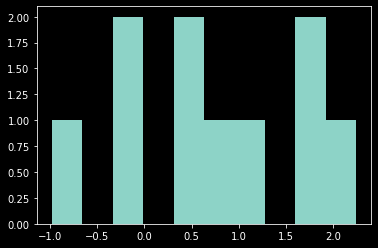

In [63]:
norm.rvs(10, random_state=0)
plt.hist(norm.rvs(10, random_state=0))

#### **예제 01. 파라미터 변경-평균**

* 표준편차 `1`, 평균이 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

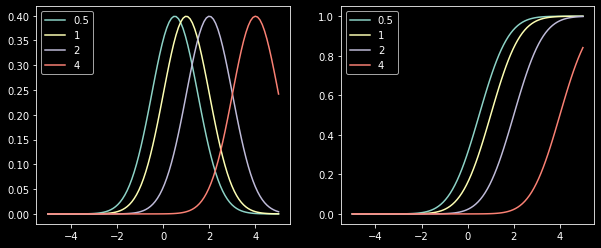

In [64]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(-5, 5, 100)
mus = [0.5,1,2,4]
std=1
for i, mu in enumerate(mus):
  norm = sp.stats.norm(mu, std)
  axes[0].plot(xs, norm.pdf(xs))
  axes[1].plot(xs, norm.cdf(xs))
axes[0].legend(mus)
_=axes[1].legend(mus)

#### **예제 02. 파라미터 변경-표준편차**

* 평균 `0`, 표준편차가 각각 `0.5, 1, 2, 4`인 확률분포와 확률누적분포를 그리세요.

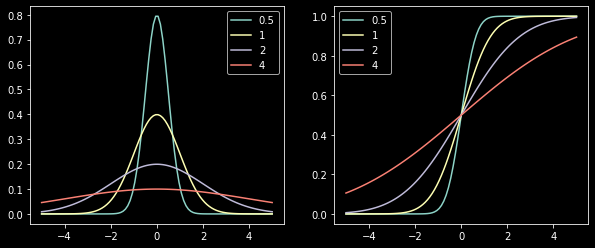

In [65]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(-5, 5, 100)
mu = 0
stds=[0.5,1,2,4]
for i, std in enumerate(stds):
  norm = sp.stats.norm(mu, std)
  axes[0].plot(xs, norm.pdf(xs))
  axes[1].plot(xs, norm.cdf(xs))
_=axes[0].legend(stds)
_=axes[1].legend(stds)

#### **예제 03. 손의 길이**

성인 손의 길이의 평균은 15.2cm 이고 표준편차는 2.5cm를 따른다고 합니다. 1000명을 표본으로 뽑고 히스토 그램을 그리세요.

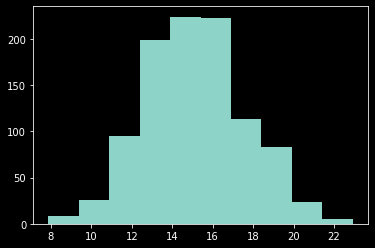

In [66]:
norm = sp.stats.norm(15.2, 2.5)
_=plt.hist(norm.rvs(1000))

### **| 카이제곱 분포**

\begin{align}
\chi^2(x; \nu) = \frac{x^{(\nu/2-1)} e^{-x/2}}{2^{\nu/2} \Gamma\left(\frac{\nu}{2}\right)}
\end{align}

```
sp.stats.chi2(df=df)
```

In [67]:
chi2 = sp.stats.chi2(df=1)

* 확률 분포


In [68]:
xs = np.linspace(0.01, 5, 10)
chi2.pdf(xs)

array([3.96952547, 0.40043489, 0.21555244, 0.13358544, 0.08774418,
       0.05950621, 0.04118183, 0.02890209, 0.02049307, 0.01464498])

* 누적 확률 분포


In [69]:
xs = np.linspace(0.01, 5, 10)
chi2.cdf(xs)

array([0.07965567, 0.54752497, 0.70984217, 0.80418734, 0.86445132,
       0.90468417, 0.93224827, 0.9514577 , 0.9650078 , 0.97465268])

* 표본 추출


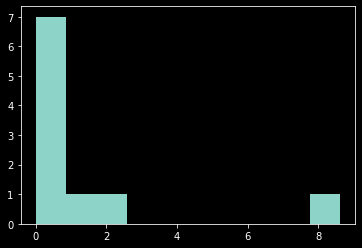

In [70]:
chi2.rvs(10, random_state=0)
_=plt.hist(chi2.rvs(10, random_state=0))

#### **예제 01. 파라미터 변경-자유도**

* 자유도(df) 값이 각각 `1,2,3,4`인 카이제곱분포와 누적 확률 분포를 그리세요.

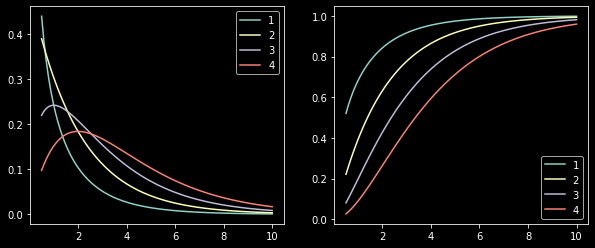

In [71]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(0.5, 10, 100)
dfs=[1,2,3,4]
for i, df in enumerate(dfs):
  chi2 = sp.stats.chi2(df)
  axes[0].plot(xs, chi2.pdf(xs))
  axes[1].plot(xs, chi2.cdf(xs))
_=axes[0].legend(dfs)
_=axes[1].legend(dfs)

### **| 감마분포**

\begin{align}
\text{Gam}(x;a,b) = \frac{1}{\Gamma(a)} b^a x^{a-1}e^{-bx}
\end{align}

```
sp.stats.gamma(a=a, b=1)
```

In [72]:
gamma=sp.stats.gamma(a=5)

* 확률 분포

In [73]:
xs = np.linspace(0.01, 5, 10)
gamma.pdf(xs)

array([4.12520764e-10, 2.40512948e-03, 2.13309075e-02, 6.12913483e-02,
       1.10602421e-01, 1.54544040e-01, 1.83630209e-01, 1.95072120e-01,
       1.90902967e-01, 1.75467370e-01])

* 누적 확률 분포


In [74]:
xs = np.linspace(0.01, 5, 10)
gamma.cdf(xs)

array([8.26418564e-13, 2.99269244e-04, 5.82849450e-03, 2.79499735e-02,
       7.55345868e-02, 1.49565851e-01, 2.44117709e-01, 3.49900440e-01,
       4.57532152e-01, 5.59506715e-01])

* 표본 추출

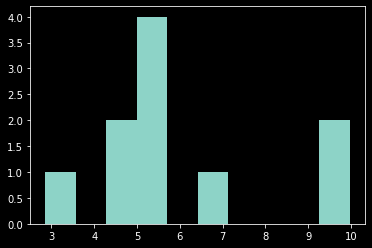

In [75]:
gamma.rvs(10, random_state=0)
_=plt.hist(gamma.rvs(10, random_state=0))

#### **예제 01. 파라미터 변경-a**

* a 값이 각각 `1,2,4,8`인 감마 분포와 누적 확률 분포를 그리세요.

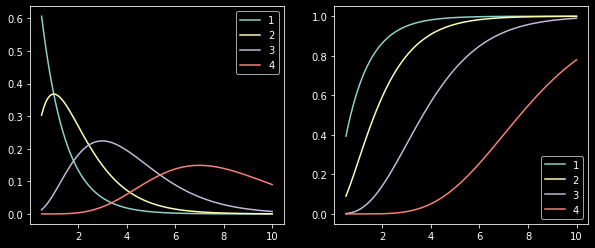

In [76]:
fig, axes = plt.subplots(1,2, figsize=(10,4))
axes = axes.flatten()

xs = np.linspace(0.5, 10, 100)
a=[1,2,4,8]
for i, ai in enumerate(a):
  gamma = sp.stats.gamma(ai)
  axes[0].plot(xs, gamma.pdf(xs))
  axes[1].plot(xs, gamma.cdf(xs))
_=axes[0].legend(dfs)
_=axes[1].legend(dfs)

## 이산형 확률 분포
---

### |  **베르누이 분포**

\begin{split}
\begin{align}
\text{Bern}(x;\mu) = 
\begin{cases} 
\mu   & \text{if }x=1, \\
1-\mu & \text{if }x=0
\end{cases}
\end{align}
\end{split}

* 기본사용

```
mu = 0.5
rv = sp.stats.bernoulli(mu)
```

In [77]:
mu = 0.5
bern = sp.stats.bernoulli(mu)

* 확률 분포


In [78]:
bern.pmf([0,1])

array([0.5, 0.5])

* 누적 확률 분포


In [79]:
bern.cdf([0,1])

array([0.5, 1. ])

* 표본 추출

In [80]:
bern.rvs(10, random_state=0)

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 0])

#### **예제 01. 동전 던지기**

동전을 던져서 앞면이 나온 확률



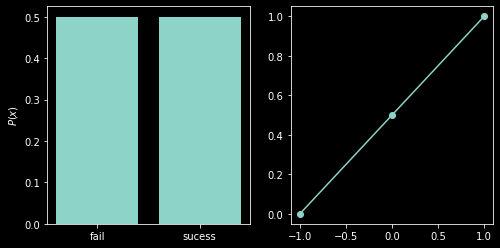

In [81]:
def plot_bern(mu):
  # 정의
  #mu = 0.5
  bern = sp.stats.bernoulli(mu)
  plt.figure(figsize=(8,4))

  # 학률분포
  plt.subplot(121)
  plt.bar(['fail','sucess'], bern.pmf([0,1]), align="center")
  plt.ylabel("$P(x)$")
  
  # 누적 확률 분포
  plt.subplot(122)
  plt.plot([-1,0,1], bern.cdf([-1,0,1]), marker='o')

plot_bern(0.5)

#### **예제 02. 주사위 굴리기**

주사위 던져서 6이 나온 확률


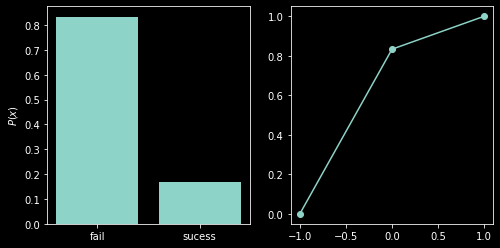

In [82]:
plot_bern(1/6)

#### **예제 03. 같은 생일**

두 사람의 생일 월(月)이 같을 확률


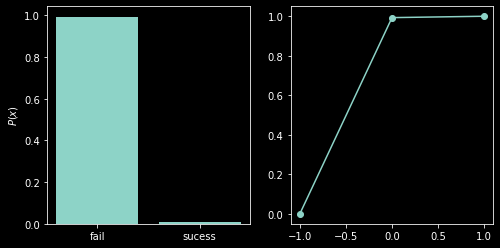

In [83]:
plot_bern((1/12)*(1/12))

#### **예제 04. 주머니 공**
주머니에 5개의 공이 들어있고 3개는 빨강, 2개는 하양이다. 공 2개를 뽑았을 때 색깔이 모두 다를 확률은?

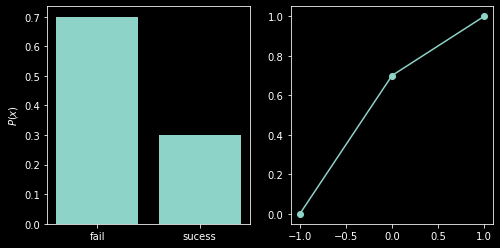

In [84]:
plot_bern((3/5)*(2/4))

### |  **이항분포**

\begin{align}
\text{Bin}(x;N,\mu) = \binom N x \; \mu^x(1-\mu)^{N-x}
\end{align}


```
sp.stats.binom(N, mu)
```

In [85]:
# 성공확률 0.5를 10번 시행 했을 때 성공 횟수
N = 10
mu = 0.5
binom = sp.stats.binom(N, mu) 

* 확률 분포


In [86]:
binom.pmf([i for i in range(11)]) # 100번 시행 했으니 이론적으로 0부터 100까지의 변수 존재

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

* 누적 확률  분포

In [87]:
binom.cdf([i for i in range(11)])

array([9.76562500e-04, 1.07421875e-02, 5.46875000e-02, 1.71875000e-01,
       3.76953125e-01, 6.23046875e-01, 8.28125000e-01, 9.45312500e-01,
       9.89257812e-01, 9.99023438e-01, 1.00000000e+00])

* 확률 변수 표본 추출


In [88]:
binom.rvs(100, random_state=0) # 100번의 시뮬레이션을 통해 표본 100개 추출

array([5, 6, 5, 5, 5, 6, 5, 7, 8, 5, 6, 5, 5, 7, 3, 3, 2, 7, 6, 7, 8, 6,
       5, 6, 3, 6, 3, 7, 5, 5, 4, 6, 5, 5, 2, 5, 5, 5, 7, 6, 4, 5, 6, 3,
       6, 6, 4, 3, 4, 4, 5, 5, 8, 3, 4, 3, 6, 4, 5, 4, 3, 3, 6, 3, 4, 4,
       6, 3, 7, 3, 8, 5, 8, 5, 6, 2, 4, 3, 4, 3, 4, 5, 3, 6, 5, 4, 5, 3,
       5, 7, 4, 6, 3, 6, 4, 4, 5, 2, 7, 1])

#### **예제 01. 동전 던지기**

* 동전을 1번 던졌을 때 앞면이 나온 횟수의 확률분포



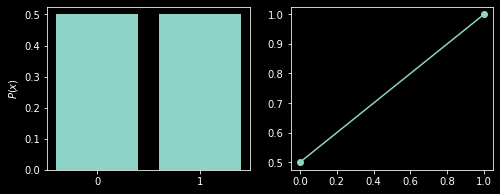

In [89]:
def plot_binom(n, mu):
  # 정의
  binom = sp.stats.binom(n, mu)
  xs = np.arange(n + 1)

  plt.figure(figsize=(8,3))
  # 시각화
  plt.subplot(121)
  plt.bar(xs, binom.pmf(xs), align="center")
  plt.ylabel("$P(x)$")
  plt.xticks(xs)
  
  # 누적 확률 분포
  plt.subplot(122)
  plt.plot(xs, binom.cdf(xs), marker='o')
  plt.show()

plot_binom(1, 1/2)

* 동전을 10번 던졌을 때 앞면이 나온 횟수의 확률분포


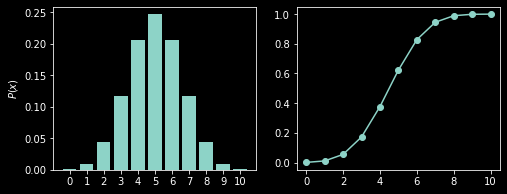

In [90]:
plot_binom(10, 1/2)

#### **예제 02. 주사위 굴리기**

* 주사위를 1번 던져서 짝수가 나온 횟수의 분포

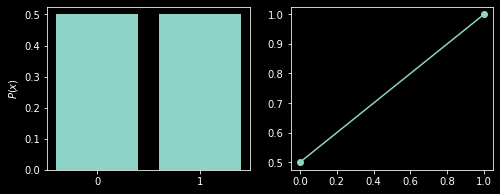

In [91]:
plot_binom(1, 1/2)

* 주사위를 6번 던져서 짝수가 나온 횟수의 분포

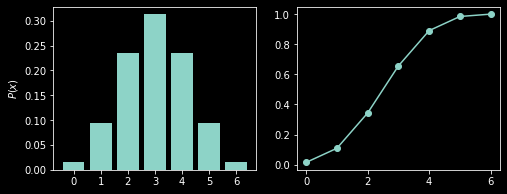

In [92]:
plot_binom(6, 1/2)

* 주사위를 20번 던져서 짝수가 나온 횟수의 분포

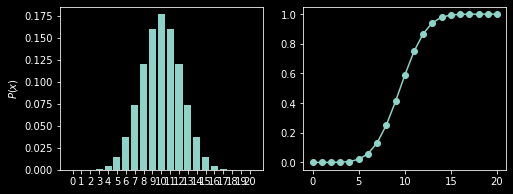

In [93]:
plot_binom(20, 1/2)

* 주사위를 1번 던져서 6이 나온 횟수의 분포

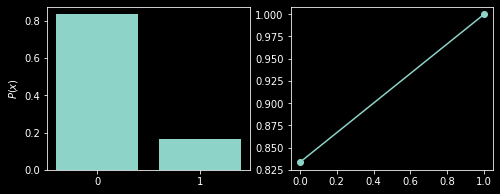

In [94]:
plot_binom(1, 1/6)

* 주사위를 6번 던져서 6이 나온 횟수의 분포

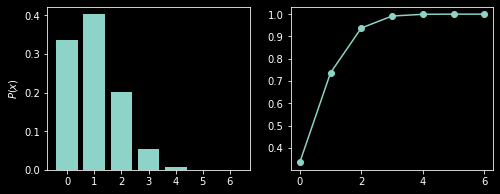

In [95]:
plot_binom(6, 1/6)

* 주사위를 20번 던져서 6이 나온 횟수의 분포

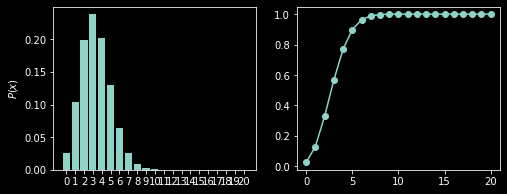

In [96]:
plot_binom(20, 1/6)

### **| 카테고리 확률분포**

\begin{split} 
\begin{align}
\text{Cat}(x;\mu) = 
\begin{cases}
\mu_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\mu_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\mu_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\mu_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
\end{align}
\end{split}


```
sp.stats.multinomial(1, mu)
```

In [97]:
mu = [1/3,1/3,1/3]
multinomial = sp.stats.multinomial(1, mu)

* 확률 분포


In [98]:
xs = np.arange(3)
xs_oneh = pd.get_dummies(xs).values
print(xs_oneh)

multinomial.pmf(xs_oneh)

[[1 0 0]
 [0 1 0]
 [0 0 1]]


array([0.33333333, 0.33333333, 0.33333333])

* 표본 추출


In [99]:
multinomial.rvs(10, random_state=0)

array([[0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

#### **예제 01.공정하지 않은 주사위**

* 주사위의 짝수 면이 나올 확률이 홀수 면이 나올 확률의 2배일 때 확률분포를 그래세요.

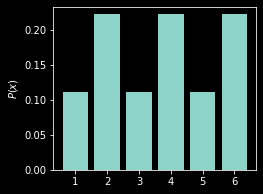

In [100]:
def plot_multi(cat, mu):
  # 정의
  multinomial = sp.stats.multinomial(1, mu)
  xs = np.arange(len(mu))
  xs_oneh = pd.get_dummies(xs).values # 원-핫 벡터로 변환
  plt.figure(figsize=(8,3))

  # 시각화
  plt.subplot(121)
  plt.bar(xs, multinomial.pmf(xs_oneh), align="center")
  plt.ylabel("$P(x)$")
  plt.xticks(xs, labels=cat)
  
plot_multi([1,2,3,4,5,6],[1/9,2/9,1/9,2/9,1/9,2/9])

#### **예제 02. 주머니 공**

주머니 안에 빨간색 5개, 노란색, 3개 초록색 2개 공이 들어 있을 때 공 한개를 뽑을 때 나오는 색깔의 확률 분포를 그리세요.

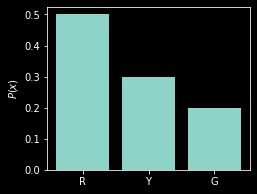

In [101]:
plot_multi(['R', 'Y','G'],[5/10,3/10,2/10])

#### **예제 03. 선호 자리**

교실에 5개의 자리가 있고 학생이 x번째 자리에 앉을 확률이 $f(X=x)=\frac{1}{2^{(x+1)}}$ 로 주어졌습니다. 확률 분포를 그리세요.

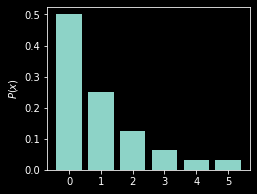

In [102]:
plot_multi([0,1,2,3,4,5],list(map(lambda x: 1/2**(x+1), [0,1,2,3,4,5])))